In [1]:
import odezoo

odezoo.set_backend("numpy")

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

import odezoo.ivps

In [5]:
ivps = [
    odezoo.ivps.lotka_volterra(),
    odezoo.ivps.lotka_volterra(parameters=(1.0, 0.1, 0.1, 1.0)),
    odezoo.ivps.rigid_body(),
    odezoo.ivps.lorenz96(),
]

In [6]:
def solve_ivp(ivp, **kwargs):
    def fun(_, y, *args):
        return ivp.vector_field(y, *args)

    t_span = ivp.time_span
    (y0,) = ivp.initial_values
    args = ivp.vector_field_args

    solution = scipy.integrate.solve_ivp(
        fun=fun, t_span=t_span, y0=y0, args=args, **kwargs
    )

    plotgrid = np.linspace(*t_span)
    return plotgrid, solution.sol(plotgrid).T

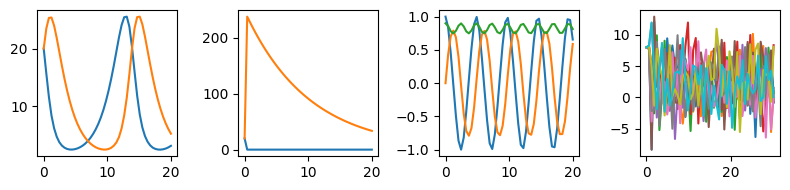

In [7]:
fig, axes = plt.subplots(ncols=len(ivps), figsize=(8, 2), tight_layout=True)

for ax, ivp in zip(axes, ivps):
    xs, ys = solve_ivp(ivp, dense_output=True)

    ax.plot(xs, ys)
plt.show()